<a href="https://colab.research.google.com/github/bluewink/dataQualityClassifier/blob/master/algorithm_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import xlrd
import pandas as pd

In [ ]:
x = pd.read_csv("/home/x인자.csv", encoding='CP949', index_col='단어')
# print(x)
y = pd.read_excel("/home/y인자.xlsx", sheet_name="Sheet1")
# x1 = pd.DataFrame(x, columns = ['consonant_con', 'vowel_con', 'spec_con', 'word_len', 'num_con'])
# # r = pd.DataFrame(y, columns = ['class'])
print(x)
print(y)
# print(r)

                                                    띄어쓰기  단모음단자음  ...  숫자  특수문자
단어                                                                ...          
comments                                               0       0  ...   0     0
9월백신출시~~현실이 되면 좋겠네요~~                                  2       0  ...   1     4
영국이 대단한게 자국백신도 계약하고 다른니라 제약회사도 선제적으로 계약하고 있다. 우...    16       0  ...   0     2
WHO말은 이제 신뢰할수 없어                                       3       0  ...   0     0
옥스퍼드대랑 벡시텤이라는 회사 합작품인데 진매트릭스가 벡시텍 지분6프로 가지고잇다          7       0  ...   1     0
와우 과거와같은생활 마스크없는생활 현실이겠죠^^                             3       0  ...   0     2
문재인 변호사는 중국 백신 기다리고 계약하는거 아닌지 모르겠네요                    7       0  ...   0     0
백신성공 축하합니다. 그백신 우한폐렴 퍼트린 중국에는 절대로 팔지 마세요~              8       0  ...   0     1
제발 누구라도 빨리 만들었으면 좋겠다 ㅠ 정말 사는게 아닌거 같다                   9       1  ...   0     0
결국은 기술력이다. 생존은 기술에 따라 달린 것이다. 단기적으로 전염병을 막는 백신을...    52       0  ...  12     0
한국의 빈수레는 요란하다. 문재앙 닮아서                  

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.6, random_state=5) #테스트셋, train셋 분류
y_train = y_train.values.ravel()

model = RandomForestClassifier(n_estimators=2, max_depth=4) 
model.fit(x_train, y_train)
print(x_test)
y_pred = model.predict(x_test)

                                                    띄어쓰기  단모음단자음  ...  숫자  특수문자
단어                                                                ...          
빨리좀개발해라.....그것도싸게개발해서. 좀버습해줘라....불안불편그리고삶의의역상싱등...     1       0  ...   0     0
코로나 백신 조만간 나오겠네요                                       3       0  ...   0     0
문재인 변호사는 중국 백신 기다리고 계약하는거 아닌지 모르겠네요                    7       0  ...   0     0
중공폭격 들어가자                                              1       0  ...   0     0
유클립투스 오일의 코점막 살균효과, 유산균의 유해균살균 효과, 쑥연기의 공기살균효과 ...    14       0  ...   0     0
미국이 빨리 정상화 되서 중공이 ㅈ됐으면 좋겠다.                            6       1  ...   0     0
영국이 대단한게 자국백신도 계약하고 다른니라 제약회사도 선제적으로 계약하고 있다. 우...    16       0  ...   0     2
역시 영국이 백신은 세계 최고다..                                    4       0  ...   0     0
WHO말은 이제 신뢰할수 없어                                       3       0  ...   0     0
문신발 투척 good!!                                          2       0  ...   0     2
주식시장에서 SK케미칼 차트 잘 보세요.                  

In [ ]:
model.score(x_test, y_test)


0.5666666666666667

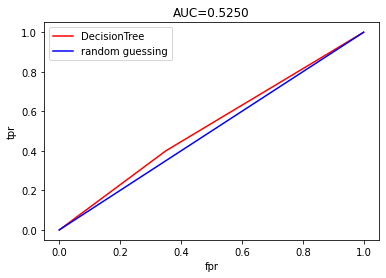

In [ ]:

from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr , _ = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, "r-", label="DecisionTree")
plt.plot([0,1], [0,1], "b-", label="random guessing")
plt.title("AUC={:.4f}".format(auc))
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.legend()

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[13,  7],
       [ 6,  4]])